# 🚢 Advanced Titanic Survival Prediction - ML Project

A comprehensive machine learning project to predict Titanic passenger survival using multiple ML models, proper preprocessing, feature engineering, and hyperparameter tuning.

---

## 📦 Step 1: Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

print('✅ All libraries imported successfully!')

✅ All libraries imported successfully!


## 📊 Step 2: Data Loading & Exploration

In [2]:
# Load dataset (CSV format - change to pd.read_excel() for xlsx files)
df = pd.read_csv('titanicsurvival.csv')

# Display first 5 rows
print('🔹 First 5 rows of the dataset:')
df.head()

🔹 First 5 rows of the dataset:


,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [3]:
# Dataset shape
print(f'🔹 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns')
print(f'\n🔹 Columns: {list(df.columns)}')

🔹 Dataset Shape: 891 rows × 5 columns

🔹 Columns: ['Pclass', 'Gender', 'Age', 'Fare', 'Survived']


In [4]:
# Dataset info
print('🔹 Dataset Info:')
df.info()

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Gender    891 non-null    object 
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [5]:
# Statistical summary
print('🔹 Statistical Summary:')
df.describe()

🔹 Statistical Summary:


,Pclass,Age,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.383838
std,0.836071,14.526497,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000
50%,3.000000,28.000000,14.454200,0.000000
75%,3.000000,38.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [6]:
# Missing values
print('🔹 Missing Values:')
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage (%)': missing_pct})
print(missing_df)

🔹 Missing Values:
          Missing Count  Percentage (%)
Pclass                0         0.00000
Gender                0         0.00000
Age                 177        19.86532
Fare                  0         0.00000
Survived              0         0.00000


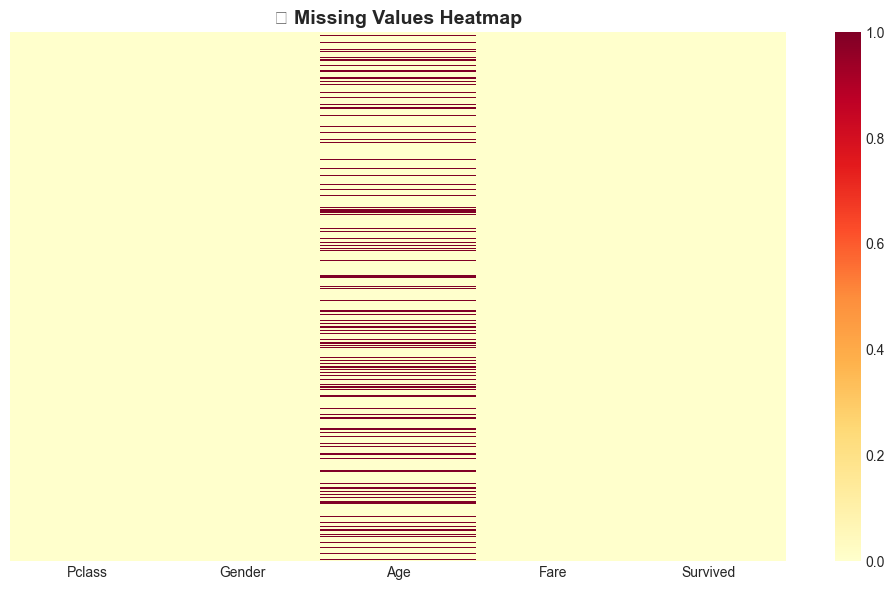

In [7]:
# Missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='YlOrRd')
plt.title('🔍 Missing Values Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

🔹 Target Variable (Survived) Distribution:
Survived
0    549
1    342
Name: count, dtype: int64

Survival Rate: 38.38%


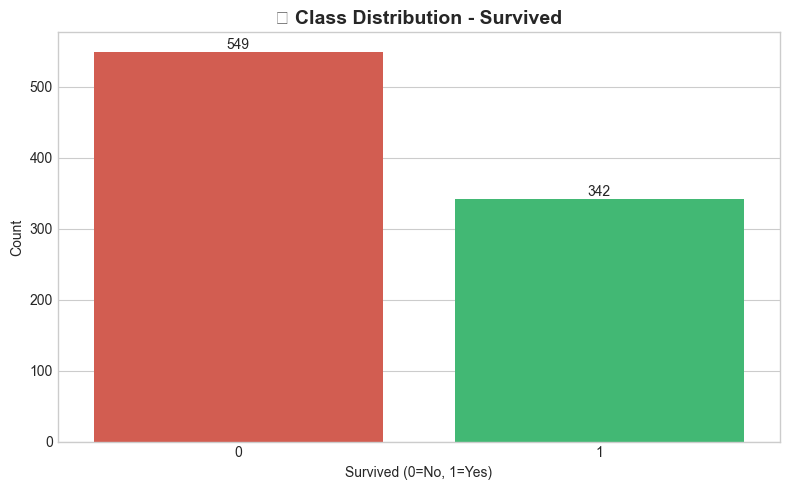

In [8]:
# Class imbalance check
print('🔹 Target Variable (Survived) Distribution:')
print(df['Survived'].value_counts())
print(f'\nSurvival Rate: {df["Survived"].mean()*100:.2f}%')

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Survived', data=df, palette=['#e74c3c', '#2ecc71'])
plt.title('🎯 Class Distribution - Survived', fontsize=14, fontweight='bold')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.show()

## 🧹 Step 3: Data Cleaning

In [9]:
# Create a copy for cleaning
df_clean = df.copy()

# Fill missing Age with median (grouped by Pclass and Gender for better accuracy)
df_clean['Age'] = df_clean.groupby(['Pclass', 'Gender'])['Age'].transform(lambda x: x.fillna(x.median()))

# If still any missing, fill with overall median
df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)

# Fill missing Fare with median
df_clean['Fare'].fillna(df_clean['Fare'].median(), inplace=True)

print('✅ Missing values handled!')
print(f'\n🔹 Remaining missing values: {df_clean.isnull().sum().sum()}')

✅ Missing values handled!

🔹 Remaining missing values: 0


## 🛠️ Step 4: Feature Engineering

In [10]:
# Create Age Bands
df_clean['AgeBand'] = pd.cut(df_clean['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])

# Create Fare Bands
df_clean['FareBand'] = pd.qcut(df_clean['Fare'], q=4, labels=['Low', 'Medium', 'High', 'VeryHigh'])

# Is Child feature
df_clean['IsChild'] = (df_clean['Age'] < 18).astype(int)

print('✅ Feature engineering completed!')
print(f'\n🔹 New columns: AgeBand, FareBand, IsChild')
df_clean.head()

✅ Feature engineering completed!

🔹 New columns: AgeBand, FareBand, IsChild


,Pclass,Gender,Age,Fare,Survived,AgeBand,FareBand,IsChild
0,3,male,22.0,7.2500,0,Adult,Low,0
1,1,female,38.0,71.2833,1,Middle,VeryHigh,0
2,3,female,26.0,7.9250,1,Adult,Medium,0
3,1,female,35.0,53.1000,1,Adult,VeryHigh,0
4,3,male,35.0,8.0500,0,Adult,Medium,0


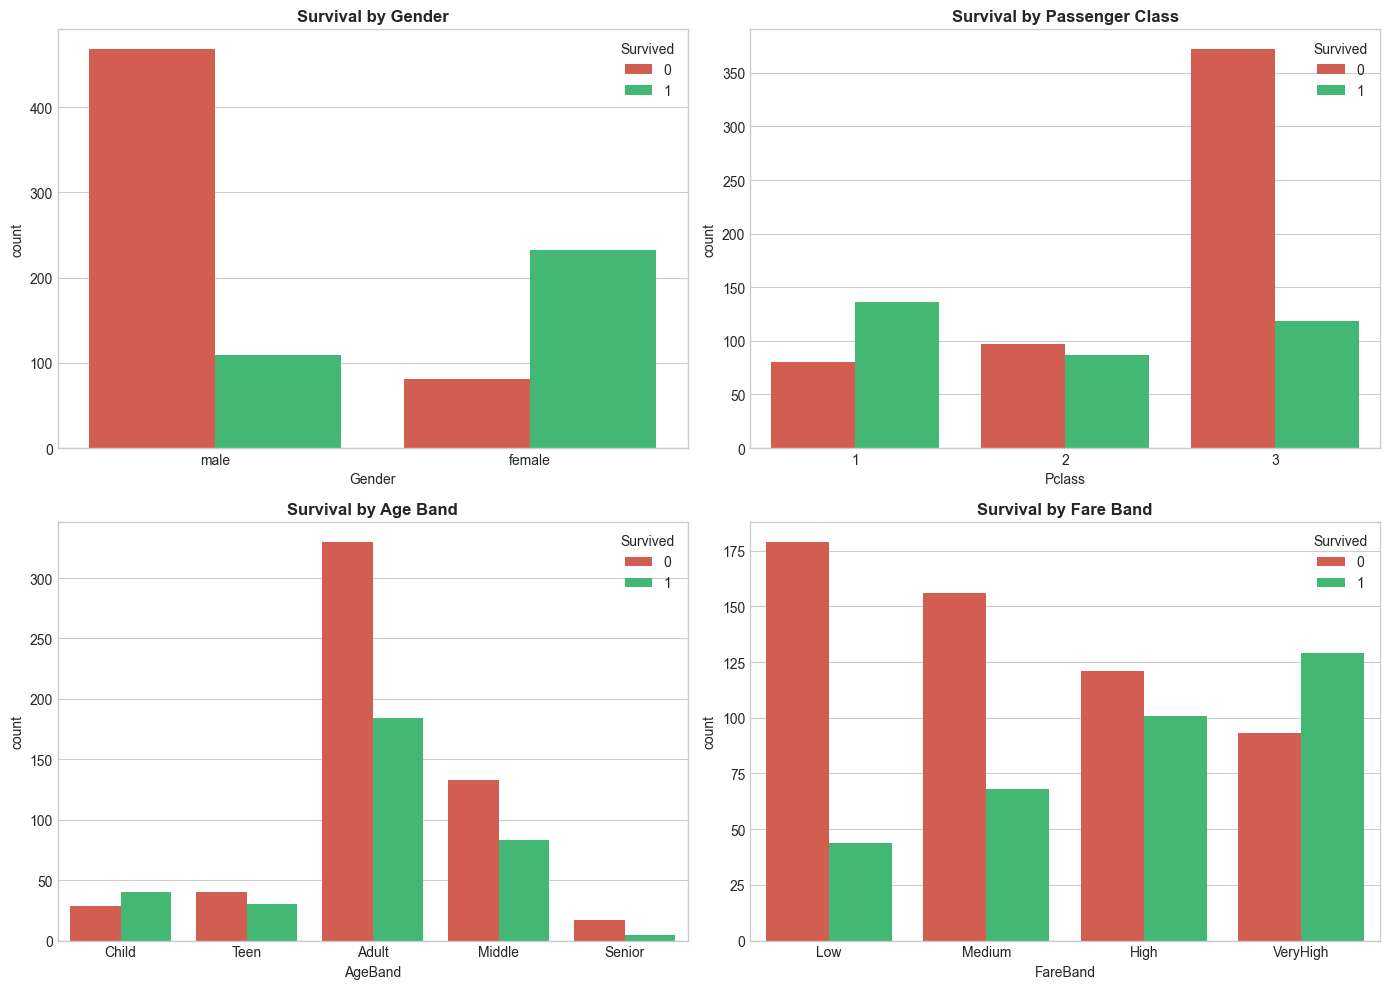

In [11]:
# Visualize survival by features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Survival by Gender
sns.countplot(x='Gender', hue='Survived', data=df_clean, ax=axes[0,0], palette=['#e74c3c', '#2ecc71'])
axes[0,0].set_title('Survival by Gender', fontweight='bold')

# Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df_clean, ax=axes[0,1], palette=['#e74c3c', '#2ecc71'])
axes[0,1].set_title('Survival by Passenger Class', fontweight='bold')

# Survival by AgeBand
sns.countplot(x='AgeBand', hue='Survived', data=df_clean, ax=axes[1,0], palette=['#e74c3c', '#2ecc71'])
axes[1,0].set_title('Survival by Age Band', fontweight='bold')

# Survival by FareBand
sns.countplot(x='FareBand', hue='Survived', data=df_clean, ax=axes[1,1], palette=['#e74c3c', '#2ecc71'])
axes[1,1].set_title('Survival by Fare Band', fontweight='bold')

plt.tight_layout()
plt.show()

## 🔄 Step 5: Encoding & Preprocessing Pipeline

In [12]:
# Prepare features and target
# Using original numeric columns + engineered IsChild
X = df_clean[['Pclass', 'Gender', 'Age', 'Fare', 'IsChild']].copy()
y = df_clean['Survived'].copy()

# Define column types
numerical_cols = ['Age', 'Fare', 'IsChild']
categorical_cols = ['Pclass', 'Gender']

print(f'🔹 Features: {list(X.columns)}')
print(f'🔹 Target: Survived')

🔹 Features: ['Pclass', 'Gender', 'Age', 'Fare', 'IsChild']
🔹 Target: Survived


In [13]:
# Create preprocessing pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine with ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

print('✅ Preprocessing pipeline created!')

✅ Preprocessing pipeline created!


In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'🔹 Training set: {X_train.shape[0]} samples')
print(f'🔹 Test set: {X_test.shape[0]} samples')

🔹 Training set: 712 samples
🔹 Test set: 179 samples


## 🤖 Step 6: Train Multiple Models & Compare

In [15]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Naive Bayes': GaussianNB()
}

# Store results
results = []

print('🚀 Training and evaluating models...\n')
print('-' * 60)

for name, model in models.items():
    # Create full pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Pipeline': pipeline
    })
    
    print(f'✅ {name:25} | Accuracy: {acc:.4f} | F1: {f1:.4f}')

print('-' * 60)

🚀 Training and evaluating models...

------------------------------------------------------------
✅ Logistic Regression       | Accuracy: 0.7877 | F1: 0.7121
✅ K-Nearest Neighbors       | Accuracy: 0.7989 | F1: 0.7231
✅ Decision Tree             | Accuracy: 0.7989 | F1: 0.7391
✅ Random Forest             | Accuracy: 0.8380 | F1: 0.7820
✅ Gradient Boosting         | Accuracy: 0.7877 | F1: 0.6885
✅ SVM                       | Accuracy: 0.7877 | F1: 0.7077
✅ Naive Bayes               | Accuracy: 0.7654 | F1: 0.7000
------------------------------------------------------------


In [16]:
# Results DataFrame
results_df = pd.DataFrame(results)[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']]
results_df = results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print('📊 Model Comparison Results:')
results_df

📊 Model Comparison Results:


,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.837989,0.812500,0.753623,0.781955
1,Decision Tree,0.798883,0.739130,0.739130,0.739130
2,K-Nearest Neighbors,0.798883,0.770492,0.681159,0.723077
3,Logistic Regression,0.787709,0.746032,0.681159,0.712121
4,Gradient Boosting,0.787709,0.792453,0.608696,0.688525
5,SVM,0.787709,0.754098,0.666667,0.707692
6,Naive Bayes,0.765363,0.690141,0.710145,0.700000


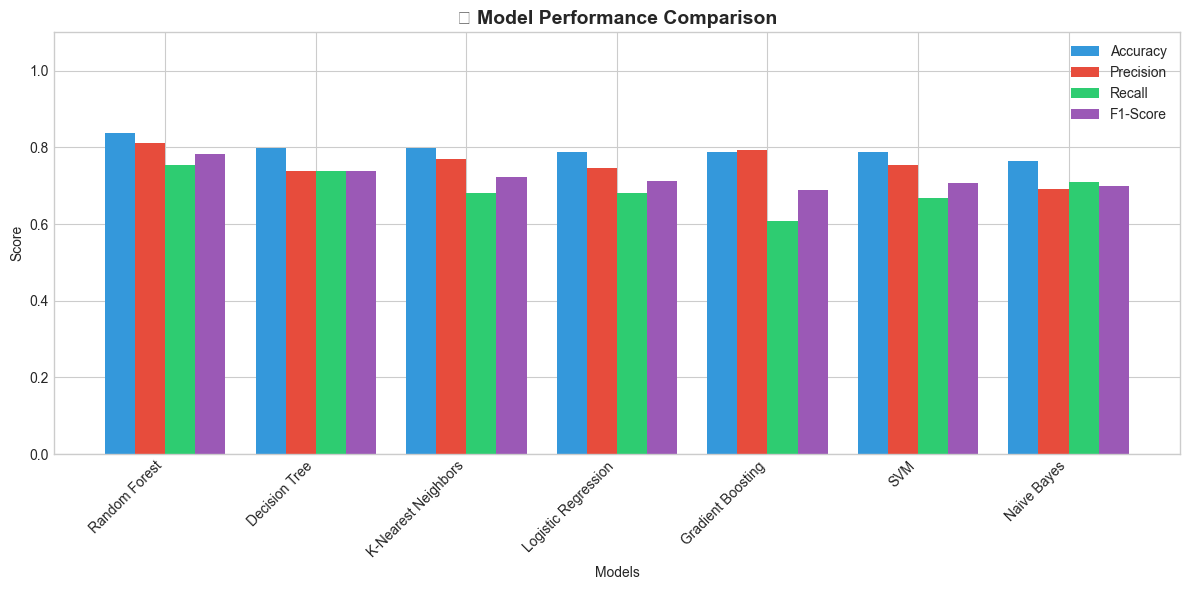

In [17]:
# Visualize model comparison
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(results_df))
width = 0.2

bars1 = ax.bar(x - width*1.5, results_df['Accuracy'], width, label='Accuracy', color='#3498db')
bars2 = ax.bar(x - width/2, results_df['Precision'], width, label='Precision', color='#e74c3c')
bars3 = ax.bar(x + width/2, results_df['Recall'], width, label='Recall', color='#2ecc71')
bars4 = ax.bar(x + width*1.5, results_df['F1-Score'], width, label='F1-Score', color='#9b59b6')

ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('📊 Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend()
ax.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

## 🔁 Step 7: Cross-Validation

In [18]:
# Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = []

print('🔁 Cross-Validation Results (5-Fold):\n')
print('-' * 70)

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    
    cv_results.append({
        'Model': name,
        'Mean CV Accuracy': scores.mean(),
        'Std': scores.std(),
        'Scores': scores
    })
    
    print(f'✅ {name:25} | Mean: {scores.mean():.4f} (+/- {scores.std():.4f})')

print('-' * 70)

🔁 Cross-Validation Results (5-Fold):

----------------------------------------------------------------------
✅ Logistic Regression       | Mean: 0.8002 (+/- 0.0150)
✅ K-Nearest Neighbors       | Mean: 0.8215 (+/- 0.0309)
✅ Decision Tree             | Mean: 0.7823 (+/- 0.0317)
✅ Random Forest             | Mean: 0.8238 (+/- 0.0281)
✅ Gradient Boosting         | Mean: 0.8361 (+/- 0.0241)
✅ SVM                       | Mean: 0.7957 (+/- 0.0162)
✅ Naive Bayes               | Mean: 0.7845 (+/- 0.0213)
----------------------------------------------------------------------


In [19]:
# CV Results DataFrame
cv_df = pd.DataFrame(cv_results)[['Model', 'Mean CV Accuracy', 'Std']]
cv_df = cv_df.sort_values('Mean CV Accuracy', ascending=False).reset_index(drop=True)
cv_df

,Model,Mean CV Accuracy,Std
0,Gradient Boosting,0.836112,0.024097
1,Random Forest,0.823759,0.028066
2,K-Nearest Neighbors,0.821537,0.030917
3,Logistic Regression,0.800213,0.015040
4,SVM,0.795725,0.016239
5,Naive Bayes,0.784502,0.021291
6,Decision Tree,0.782261,0.031698


## ⚙️ Step 8: Hyperparameter Tuning

In [20]:
# Hyperparameter tuning for Random Forest
print('⚙️ Tuning Random Forest...\n')

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

rf_search = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf_search.fit(X_train, y_train)

print(f'\n✅ Best RF Parameters: {rf_search.best_params_}')
print(f'✅ Best RF CV Score: {rf_search.best_score_:.4f}')

⚙️ Tuning Random Forest...

Fitting 5 folds for each of 108 candidates, totalling 540 fits

✅ Best RF Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
✅ Best RF CV Score: 0.8330


In [21]:
# Hyperparameter tuning for Gradient Boosting
print('⚙️ Tuning Gradient Boosting...\n')

gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

gb_params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

gb_search = GridSearchCV(gb_pipeline, gb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
gb_search.fit(X_train, y_train)

print(f'\n✅ Best GB Parameters: {gb_search.best_params_}')
print(f'✅ Best GB CV Score: {gb_search.best_score_:.4f}')

⚙️ Tuning Gradient Boosting...

Fitting 5 folds for each of 27 candidates, totalling 135 fits

✅ Best GB Parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
✅ Best GB CV Score: 0.8189


In [22]:
# Hyperparameter tuning for SVM
print('⚙️ Tuning SVM...\n')

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

svm_params = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto', 0.1, 1],
    'classifier__kernel': ['rbf', 'poly']
}

svm_search = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
svm_search.fit(X_train, y_train)

print(f'\n✅ Best SVM Parameters: {svm_search.best_params_}')
print(f'✅ Best SVM CV Score: {svm_search.best_score_:.4f}')

⚙️ Tuning SVM...

Fitting 5 folds for each of 24 candidates, totalling 120 fits

✅ Best SVM Parameters: {'classifier__C': 0.1, 'classifier__gamma': 1, 'classifier__kernel': 'poly'}
✅ Best SVM CV Score: 0.8343


In [23]:
# Select best model
tuned_models = {
    'Random Forest (Tuned)': rf_search,
    'Gradient Boosting (Tuned)': gb_search,
    'SVM (Tuned)': svm_search
}

best_model_name = max(tuned_models, key=lambda k: tuned_models[k].best_score_)
best_model = tuned_models[best_model_name].best_estimator_

print(f'\n🏆 Best Model: {best_model_name}')
print(f'🏆 Best CV Score: {tuned_models[best_model_name].best_score_:.4f}')


🏆 Best Model: SVM (Tuned)
🏆 Best CV Score: 0.8343


## 📈 Step 9: Final Evaluation

In [24]:
# Final predictions with best model
y_pred_final = best_model.predict(X_test)

# Metrics
final_accuracy = accuracy_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final)
final_recall = recall_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)

print('📈 Final Model Performance on Test Set:')
print('=' * 50)
print(f'🎯 Accuracy:  {final_accuracy:.4f} ({final_accuracy*100:.2f}%)')
print(f'🎯 Precision: {final_precision:.4f}')
print(f'🎯 Recall:    {final_recall:.4f}')
print(f'🎯 F1-Score:  {final_f1:.4f}')
print('=' * 50)

📈 Final Model Performance on Test Set:
🎯 Accuracy:  0.8156 (81.56%)
🎯 Precision: 0.8103
🎯 Recall:    0.6812
🎯 F1-Score:  0.7402


In [25]:
# Classification Report
print('📋 Classification Report:\n')
print(classification_report(y_test, y_pred_final, target_names=['Not Survived', 'Survived']))

📋 Classification Report:

              precision    recall  f1-score   support

Not Survived       0.82      0.90      0.86       110
    Survived       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



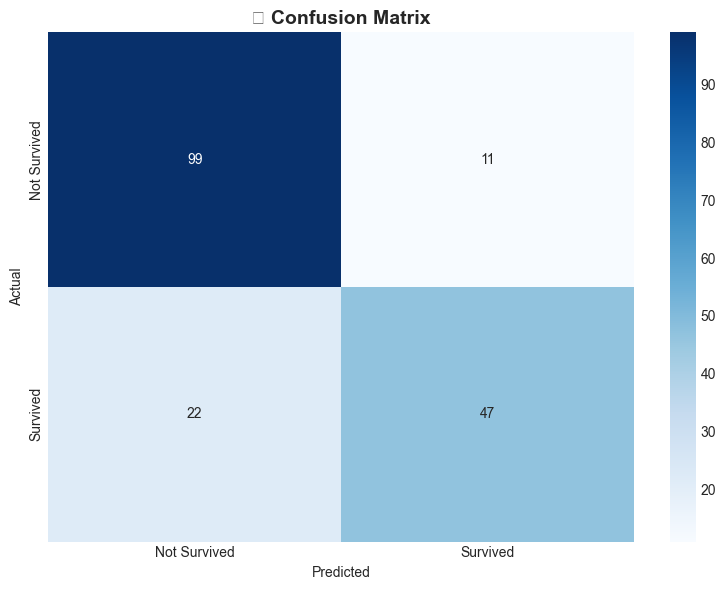


📊 Confusion Matrix Breakdown:
   True Negatives:  99
   False Positives: 11
   False Negatives: 22
   True Positives:  47


In [26]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('🎯 Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Print confusion matrix breakdown
tn, fp, fn, tp = cm.ravel()
print(f'\n📊 Confusion Matrix Breakdown:')
print(f'   True Negatives:  {tn}')
print(f'   False Positives: {fp}')
print(f'   False Negatives: {fn}')
print(f'   True Positives:  {tp}')

## 🔍 Step 10: Feature Importance & Insights

In [27]:
# Get feature names after preprocessing
feature_names = numerical_cols + list(best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_cols))

# Get feature importance (works for tree-based models)
try:
    importances = best_model.named_steps['classifier'].feature_importances_
    
    # Create DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('🔍 Feature Importance', fontsize=14, fontweight='bold')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
    
    print('📊 Feature Importance Table:')
    print(importance_df.to_string(index=False))
    
except AttributeError:
    print('Note: Feature importance not available for this model type.')

Note: Feature importance not available for this model type.


## 🔮 Step 11: Custom Prediction Function

In [28]:
def predict_survival(Pclass, Gender, Age, Fare, IsChild=None):
    """
    Predict survival probability for a passenger.
    
    Parameters:
    -----------
    Pclass : int (1, 2, or 3)
    Gender : str ('male' or 'female')
    Age : float
    Fare : float
    IsChild : int (optional, 0 or 1, auto-calculated if not provided)
    
    Returns:
    --------
    Prediction and probability
    """
    # Auto-calculate IsChild if not provided
    if IsChild is None:
        IsChild = 1 if Age < 18 else 0
    
    # Create input DataFrame
    input_data = pd.DataFrame({
        'Pclass': [Pclass],
        'Gender': [Gender.lower()],
        'Age': [Age],
        'Fare': [Fare],
        'IsChild': [IsChild]
    })
    
    # Predict
    prediction = best_model.predict(input_data)[0]
    probability = best_model.predict_proba(input_data)[0]
    
    # Output
    result = 'Survived ✅' if prediction == 1 else 'Not Survived ❌'
    
    print('=' * 50)
    print('🔮 SURVIVAL PREDICTION')
    print('=' * 50)
    print(f'\n📋 Passenger Details:')
    print(f'   Class:  {Pclass}')
    print(f'   Gender: {Gender}')
    print(f'   Age:    {Age}')
    print(f'   Fare:   ${Fare:.2f}')
    print(f'\n🎯 Prediction: {result}')
    print(f'📊 Probability of Survival: {probability[1]*100:.2f}%')
    print(f'📊 Probability of Not Surviving: {probability[0]*100:.2f}%')
    print('=' * 50)
    
    return prediction, probability[1]

print('✅ Prediction function created successfully!')

✅ Prediction function created successfully!


In [29]:
# Example predictions
print('\n📌 Example Prediction 1: First class female passenger')
predict_survival(Pclass=1, Gender='female', Age=29, Fare=100)


📌 Example Prediction 1: First class female passenger
🔮 SURVIVAL PREDICTION

📋 Passenger Details:
   Class:  1
   Gender: female
   Age:    29
   Fare:   $100.00

🎯 Prediction: Survived ✅
📊 Probability of Survival: 79.24%
📊 Probability of Not Surviving: 20.76%


(np.int64(1), np.float64(0.792441543312497))

In [30]:
print('\n📌 Example Prediction 2: Third class male passenger')
predict_survival(Pclass=3, Gender='male', Age=25, Fare=8)


📌 Example Prediction 2: Third class male passenger
🔮 SURVIVAL PREDICTION

📋 Passenger Details:
   Class:  3
   Gender: male
   Age:    25
   Fare:   $8.00

🎯 Prediction: Not Survived ❌
📊 Probability of Survival: 19.74%
📊 Probability of Not Surviving: 80.26%


(np.int64(0), np.float64(0.19741142138401652))

In [31]:
print('\n📌 Example Prediction 3: Child in second class')
predict_survival(Pclass=2, Gender='male', Age=8, Fare=30)


📌 Example Prediction 3: Child in second class
🔮 SURVIVAL PREDICTION

📋 Passenger Details:
   Class:  2
   Gender: male
   Age:    8
   Fare:   $30.00

🎯 Prediction: Survived ✅
📊 Probability of Survival: 77.74%
📊 Probability of Not Surviving: 22.26%


(np.int64(1), np.float64(0.7773535784431868))

## 💾 Step 12: Save the Best Model

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'best_titanic_model.pkl')

print('✅ Model saved as "best_titanic_model.pkl"')
print('\n📖 To load the model later, use:')
print('   loaded_model = joblib.load("best_titanic_model.pkl")')

---

## 📝 Summary

This notebook covered:

1. ✅ Data Loading & Exploration
2. ✅ Data Cleaning (handling missing values)
3. ✅ Feature Engineering (AgeBand, FareBand, IsChild)
4. ✅ Preprocessing Pipeline (ColumnTransformer, StandardScaler, OneHotEncoder)
5. ✅ Multiple ML Models (Logistic Regression, KNN, Decision Tree, Random Forest, Gradient Boosting, SVM, Naive Bayes)
6. ✅ Cross-Validation (StratifiedKFold)
7. ✅ Hyperparameter Tuning (GridSearchCV)
8. ✅ Final Evaluation (Accuracy, Precision, Recall, F1, Confusion Matrix)
9. ✅ Feature Importance Analysis
10. ✅ Custom Prediction Function
11. ✅ Model Saving

---

🎉 **Project Complete!**